In [39]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [40]:
Terror=pd.read_csv('globalterrorismdb_0718dist.csv', on_bad_lines='skip', encoding='latin')

In [41]:
Terror.shape

(181691, 135)

In [42]:
cols=['iyear','imonth','iday','country_txt','city','latitude',
      'longitude','location','attacktype1_txt','targtype1_txt','targsubtype1_txt','target1',
      'gname','motive','weaptype1_txt','dbsource','region_txt','nkill','nwound','natlty1_txt','weapdetail'
      ]

In [43]:
Terror_clean=pd.DataFrame(data=Terror , columns=cols)

In [44]:
Terror_clean.shape

(181691, 21)

In [45]:
Terror_clean.isnull().sum()

iyear                    0
imonth                   0
iday                     0
country_txt              0
city                   434
latitude              4556
longitude             4557
location            126196
attacktype1_txt          0
targtype1_txt            0
targsubtype1_txt     10373
target1                636
gname                    0
motive              131130
weaptype1_txt            0
dbsource                 0
region_txt               0
nkill                10313
nwound               16311
natlty1_txt           1559
weapdetail           67670
dtype: int64

In [46]:
Terror_clean.head(2)

,iyear,imonth,iday,country_txt,city,latitude,longitude,location,attacktype1_txt,targtype1_txt,...,target1,gname,motive,weaptype1_txt,dbsource,region_txt,nkill,nwound,natlty1_txt,weapdetail
0,1970,7,2,Dominican Republic,Santo Domingo,18.456792,-69.951164,NaN,Assassination,Private Citizens & Property,...,Julio Guzman,MANO-D,NaN,Unknown,PGIS,Central America & Caribbean,1.0,0.0,Dominican Republic,NaN
1,1970,0,0,Mexico,Mexico city,19.371887,-99.086624,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),...,"Nadine Chaval, daughter",23rd of September Communist League,NaN,Unknown,PGIS,North America,0.0,0.0,Belgium,NaN


In [47]:
Terror_clean.rename(columns={'iyear':'year' , 'imonth':'month' ,'iday':'day','country_txt':'country name','attacktype1_txt':'attacktype','targtype1_txt':'targtype','targsubtype2':'targsubtype2',
              'gname':'group_name','weaptype1_txt':'weaptype','dbsource':'source','region_txt':'region1','nkill':'Killed','nwound':'Wounded','weapdetail':'weapon_detail','natlty1_txt':'nationality'
 } , inplace=True)

In [48]:
Terror_clean.head(1)

,year,month,day,country name,city,latitude,longitude,location,attacktype,targtype,...,target1,group_name,motive,weaptype,source,region1,Killed,Wounded,nationality,weapon_detail
0,1970,7,2,Dominican Republic,Santo Domingo,18.456792,-69.951164,NaN,Assassination,Private Citizens & Property,...,Julio Guzman,MANO-D,NaN,Unknown,PGIS,Central America & Caribbean,1.0,0.0,Dominican Republic,NaN


In [49]:
Terror_clean['casualities']=Terror_clean['Wounded']+Terror_clean['Killed']

In [50]:
Terror_clean.head(3)

,year,month,day,country name,city,latitude,longitude,location,attacktype,targtype,...,group_name,motive,weaptype,source,region1,Killed,Wounded,nationality,weapon_detail,casualities
0,1970,7,2,Dominican Republic,Santo Domingo,18.456792,-69.951164,NaN,Assassination,Private Citizens & Property,...,MANO-D,NaN,Unknown,PGIS,Central America & Caribbean,1.0,0.0,Dominican Republic,NaN,1.0
1,1970,0,0,Mexico,Mexico city,19.371887,-99.086624,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),...,23rd of September Communist League,NaN,Unknown,PGIS,North America,0.0,0.0,Belgium,NaN,0.0
2,1970,1,0,Philippines,Unknown,15.478598,120.599741,NaN,Assassination,Journalists & Media,...,Unknown,NaN,Unknown,PGIS,Southeast Asia,1.0,0.0,United States,NaN,1.0


In [51]:
nationality_top = Terror_clean[Terror_clean['nationality'] != 'Unknown']

In [52]:
nationality_type=nationality_top['nationality'].value_counts().reset_index()

In [53]:
nationality_type.rename(columns={"index":'Nationality','nationality':'Counts'},inplace=True)
nationality_type

,Nationality,Counts
0,Iraq,24113
1,Pakistan,13900
2,India,12098
3,Afghanistan,10931
4,Colombia,7922
...,...,...
210,People's Republic of the Congo,1
211,Saba (Netherlands Antilles),1
212,Tuvalu,1
213,Western Sahara,1


In [54]:
Terror_clean['nationality'].unique()

array(['Dominican Republic', 'Belgium', 'United States', 'Uruguay',
       'Germany', 'Great Britain', 'Venezuela', 'Puerto Rico', 'Israel',
       'Austria', 'Switzerland', 'Jordan', 'Ethiopia', 'Spain', nan,
       'Japan', 'International', 'Egypt', 'Paraguay', 'Soviet Union',
       'Ireland', 'Argentina', 'Philippines', 'China',
       'West Bank and Gaza Strip', 'Multinational', 'Northern Ireland',
       'Brazil', 'Haiti', 'South Africa', 'Portugal', 'Colombia',
       'Greece', 'Nicaragua', 'Indonesia', 'Yugoslavia', 'Italy',
       'Rhodesia', 'Ivory Coast', 'Iran', 'Canada', 'Poland', 'Sweden',
       'Turkey', 'Costa Rica', 'Russia', 'Iraq', 'Cuba', 'France',
       'Malawi', 'Democratic Republic of the Congo', 'Netherlands',
       'Chile', 'Hong Kong', 'Yemen', 'Mexico', 'Syria', 'India',
       'New Zealand', 'Senegal', 'Algeria', 'Peru', 'Czechoslovakia',
       'Saudi Arabia', 'Denmark', 'West Germany (FRG)', 'Bahamas',
       'Bolivia', 'El Salvador', 'Botswana', 'Guate

In [55]:
terr= Terror_clean[Terror_clean['group_name'] != 'Unknown']
Terror_Group_Org=terr['group_name'].value_counts().reset_index()
Terror_Group_Org.rename(columns={"index":'Group_name','group_name':'Counts'},inplace=True)
Terror_Group_Org

,Group_name,Counts
0,Taliban,7478
1,Islamic State of Iraq and the Levant (ISIL),5613
2,Shining Path (SL),4555
3,Farabundo Marti National Liberation Front (FMLN),3351
4,Al-Shabaab,3288
...,...,...
3531,Ansar Sarallah,1
3532,Sword of Islam,1
3533,Support of Ocalan-The Hawks of Thrace,1
3534,Arab Revolutionary Front,1


In [56]:
city1= Terror_clean[Terror_clean['city'] != 'Unknown']

In [57]:
city_cln=city1['city'].value_counts().reset_index()
city_cln.rename(columns={"index":'City_name','city':'Counts'},inplace=True)
city_cln

,City_name,Counts
0,Baghdad,7589
1,Karachi,2652
2,Lima,2359
3,Mosul,2265
4,Belfast,2171
...,...,...
36668,Hotwag,1
36669,Ostend,1
36670,Balughata,1
36671,Jikoyi,1


In [58]:
wp=Terror_clean[Terror_clean['weaptype'] != 'Unknown']
weaptype_cln=wp['weaptype'].value_counts().reset_index()
weaptype_cln.rename(columns={"index":'weapon_type','weaptype':'Counts'},inplace=True)
weaptype_cln

,weapon_type,Counts
0,Explosives,92426
1,Firearms,58524
2,Incendiary,11135
3,Melee,3655
4,Chemical,321
5,Sabotage Equipment,141
6,Vehicle (not to include vehicle-borne explosiv...,136
7,Other,114
8,Biological,35
9,Fake Weapons,33


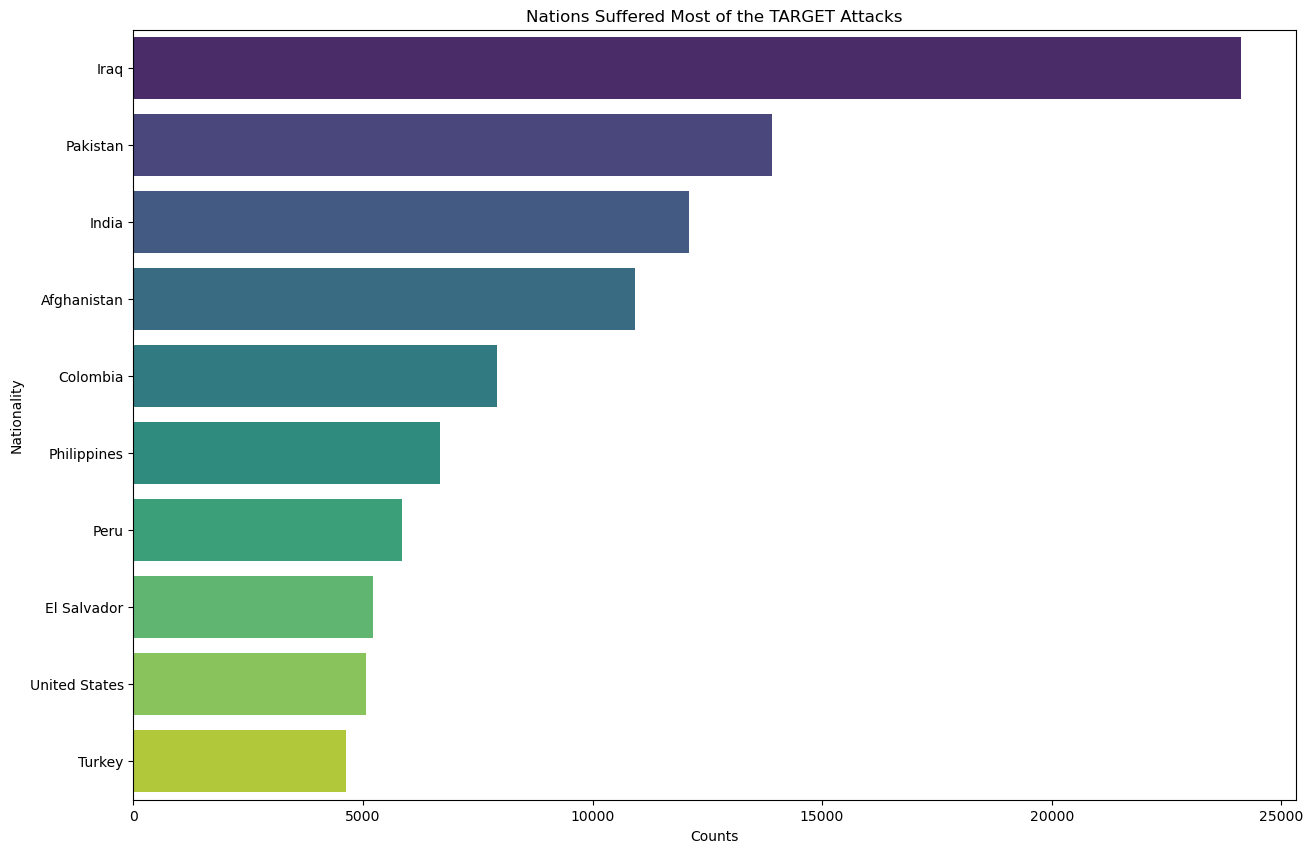

In [59]:
f, ax = plt.subplots(figsize=(15, 10))
ax = sns.barplot(x="Counts", y="Nationality", data=nationality_type[:10],
                 palette="viridis").set_title('Nations Suffered Most of the TARGET Attacks')

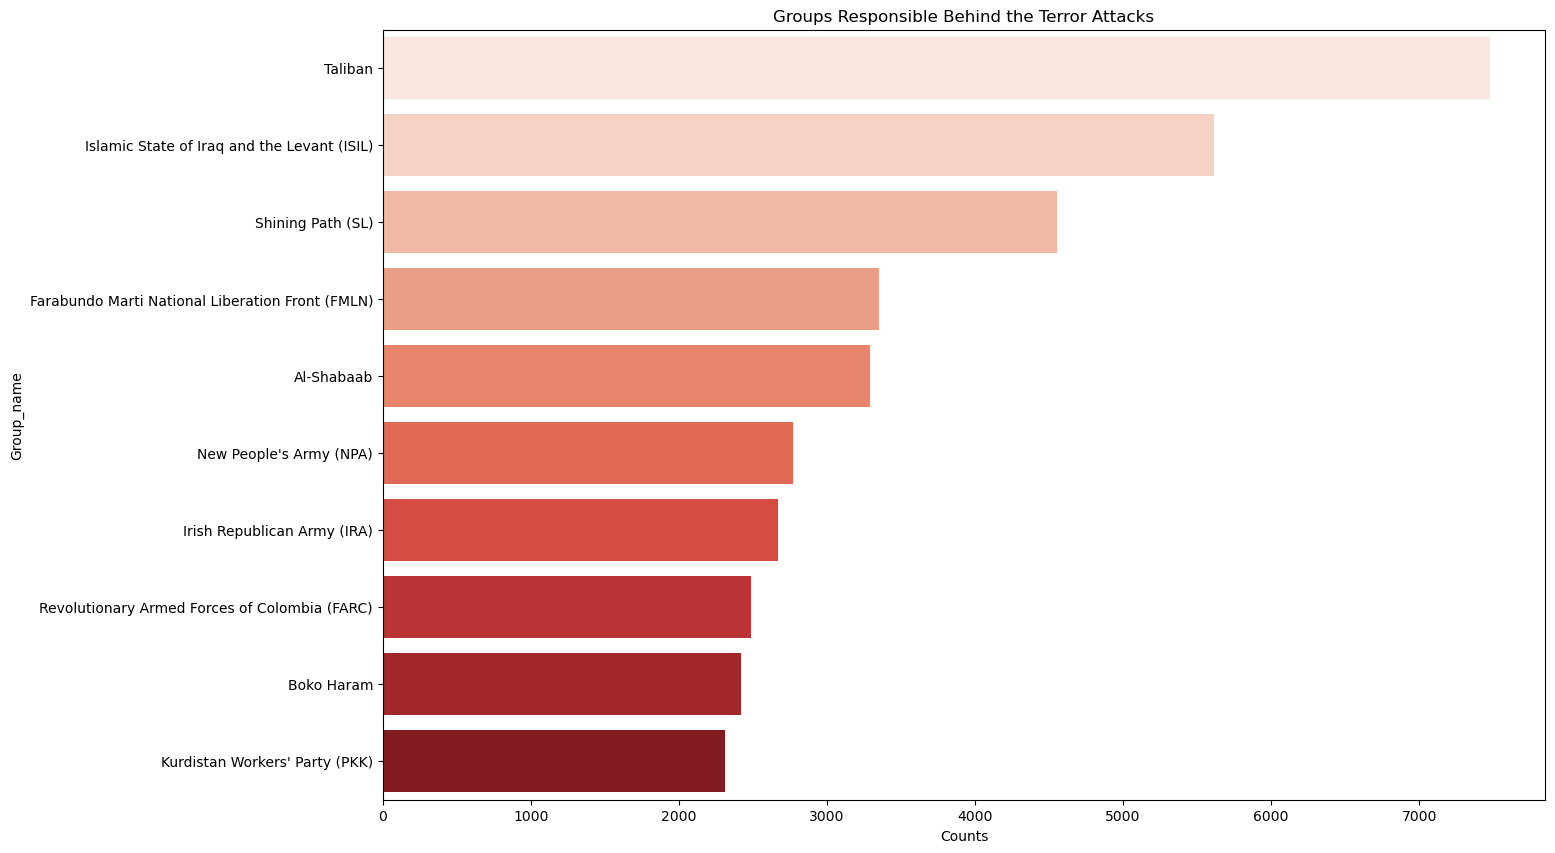

In [60]:
f, ax = plt.subplots(figsize=(15, 10))
ax = sns.barplot(x="Counts", y="Group_name", data=Terror_Group_Org[:10],
                 palette="Reds").set_title('Groups Responsible Behind the Terror Attacks')

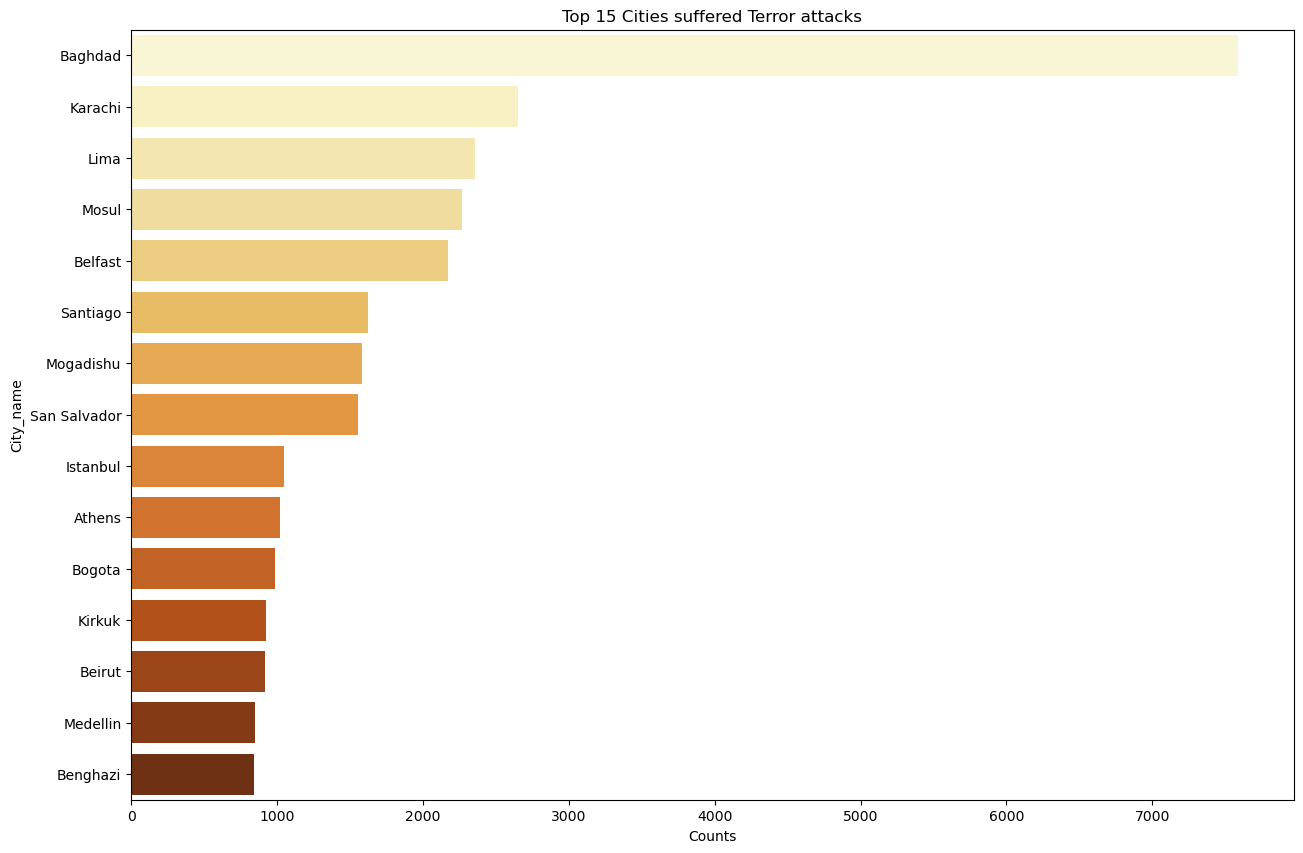

In [61]:
f, ax = plt.subplots(figsize=(15, 10))
ax = sns.barplot(x="Counts", y="City_name", data=city_cln[:15],
                 palette="YlOrBr").set_title('Top 15 Cities suffered Terror attacks')

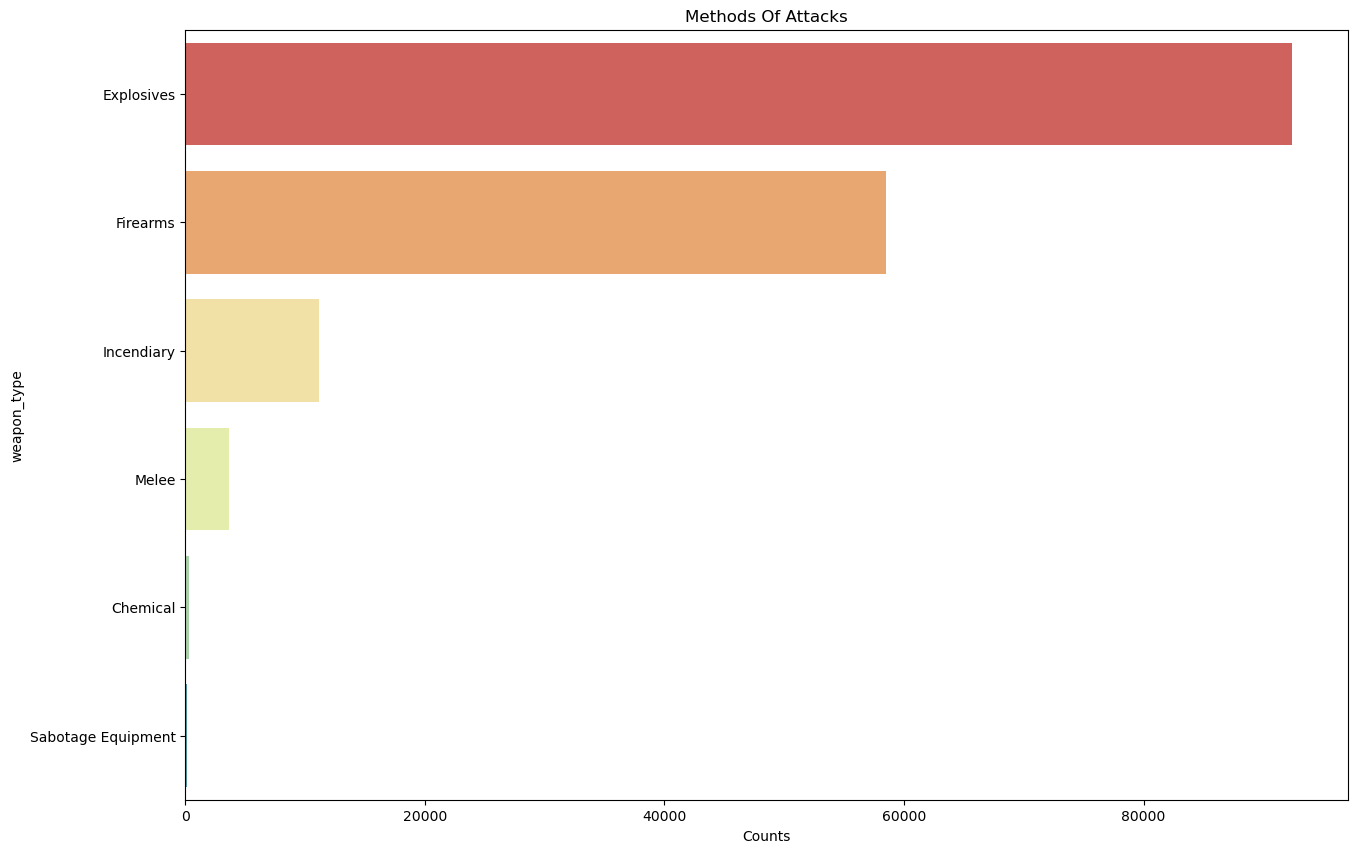

In [62]:
f, ax = plt.subplots(figsize=(15, 10))
ax = sns.barplot(x="Counts", y="weapon_type", data=weaptype_cln[:6],
                 palette="Spectral").set_title('Methods Of Attacks')

In [63]:
Terror_clean['month'].unique()

array([ 7,  0,  1,  2,  3,  4,  5,  6,  8,  9, 10, 11, 12], dtype=int64)

In [64]:
def Month_name(inp):
    if inp == 1:
        return 'January'
    if inp==2:
        return 'February'
    if inp==3:
        return 'March'
    if inp==4:
        return 'April'
    if inp == 5:
        return 'May'
    if inp==6:
        return 'June'
    if inp==7:
        return 'July'
    if inp==8:
        return 'August'    
    if inp == 9:
        return 'September'
    if inp==10:
        return 'October'
    if inp==11:
        return 'November'
    if inp==0:
        return 'Missing'    
    
    else:
        return 'December'

In [65]:
Terror_clean['month_new']=Terror_clean['month'].apply(Month_name)

In [66]:
wp4=Terror_clean[Terror_clean['month_new'] != 'Missing']
weaptype_cln2=wp4['month_new'].value_counts().reset_index()
weaptype_cln2.rename(columns={"index":'months','month_new':'Counts'},inplace=True)
weaptype_cln2

,months,Counts
0,May,16875
1,July,16268
2,August,15800
3,October,15563
4,June,15359
5,March,15257
6,April,15152
7,January,14936
8,November,14906
9,September,14180


In [67]:
Terror_clean['attacktype'].unique()

array(['Assassination', 'Hostage Taking (Kidnapping)',
       'Bombing/Explosion', 'Facility/Infrastructure Attack',
       'Armed Assault', 'Hijacking', 'Unknown', 'Unarmed Assault',
       'Hostage Taking (Barricade Incident)'], dtype=object)

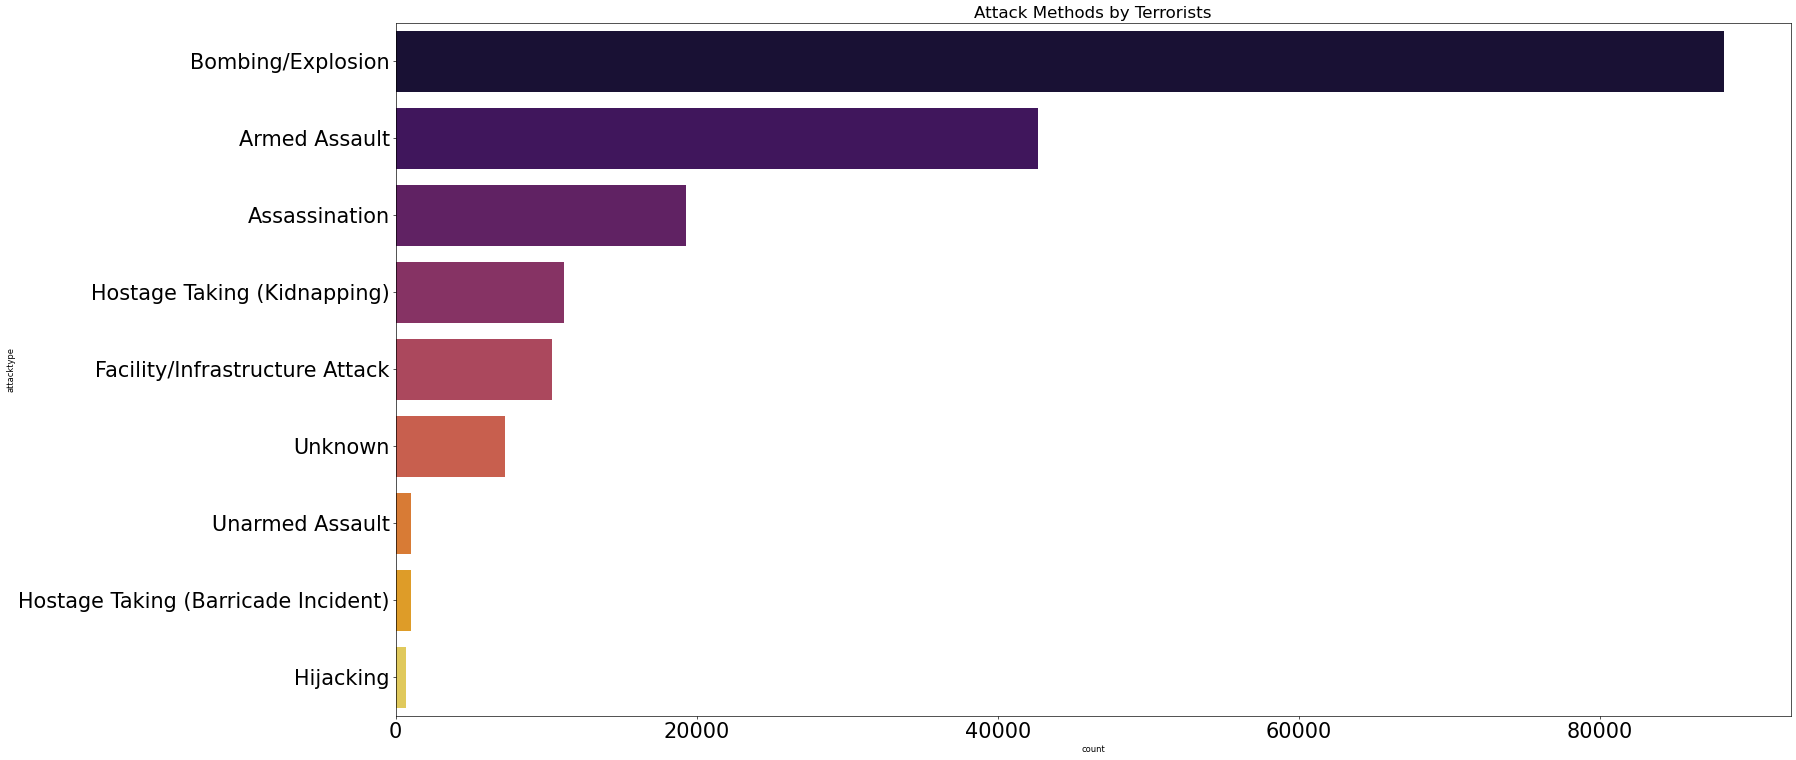

In [68]:
plt.subplots(figsize=(30,15),dpi=60)
sns.countplot(y='attacktype',data=Terror_clean,palette='inferno',order=Terror_clean['attacktype'].value_counts().index)
plt.yticks(size=25)
plt.xticks(size=25)
plt.title('Attack Methods by Terrorists',size=20)
plt.show()

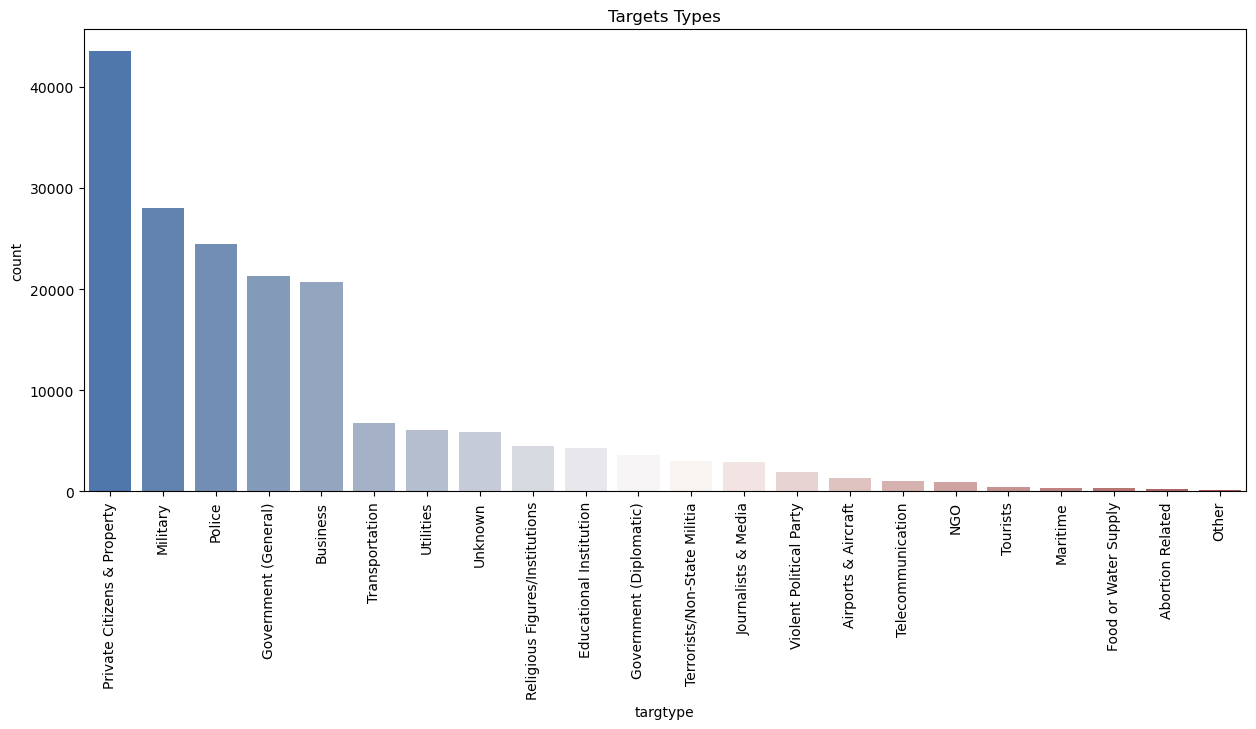

In [69]:
plt.subplots(figsize=(15,6),dpi=100)
sns.countplot(x=Terror_clean['targtype'],palette='vlag',order=Terror_clean['targtype'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Targets Types')
plt.show()

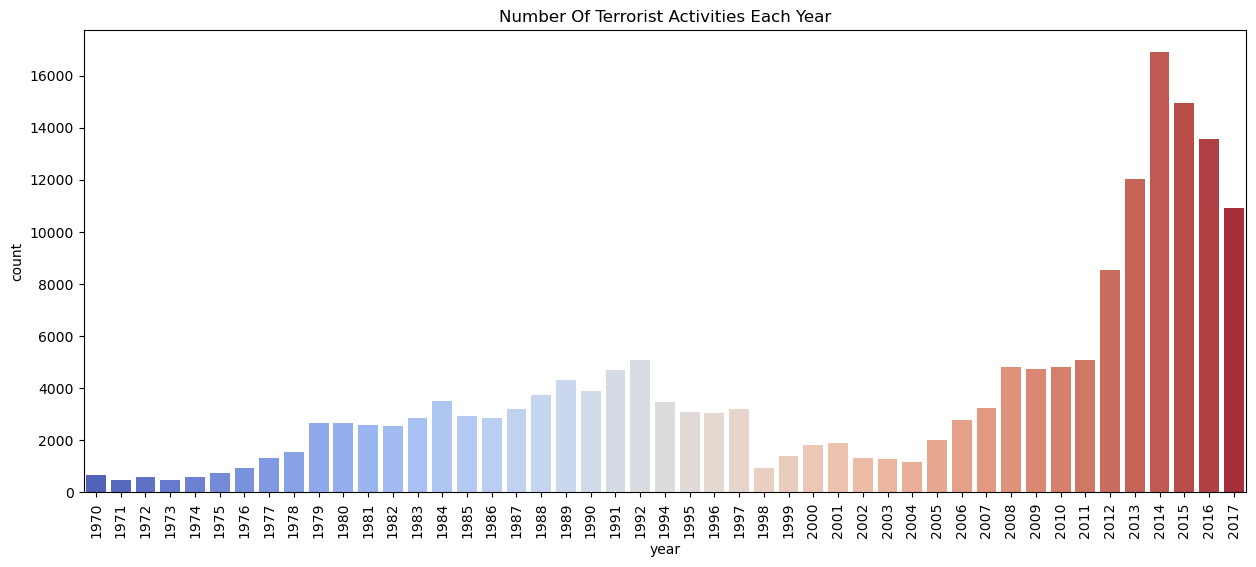

In [70]:
plt.subplots(figsize=(15,6))
sns.countplot(x='year',data=Terror_clean,palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

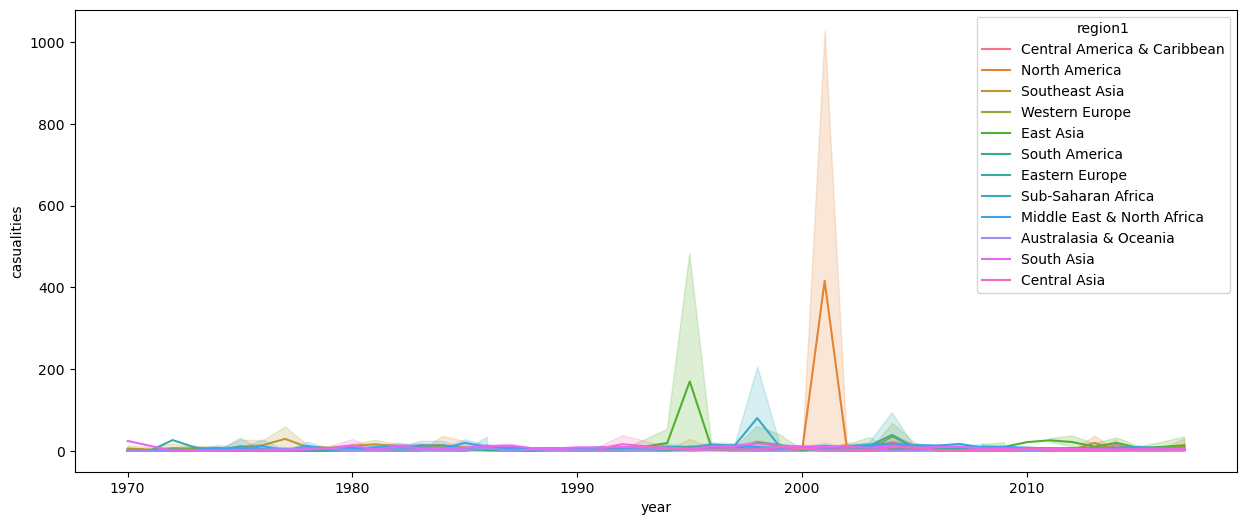

In [71]:
plt.subplots(figsize=(15,6),dpi=100)
sns.lineplot(x='year', y='casualities',hue='region1',data=Terror_clean)
plt.show()